In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
owd=os.getcwd()
path=os.chdir('EOS')
EOSlist=[]
listOfEntries= os.scandir(path)
for entry in listOfEntries:
    if entry.path.endswith('dat'):
        EOSlist.append(entry.name)
os.chdir(owd)
EOSlist.sort()

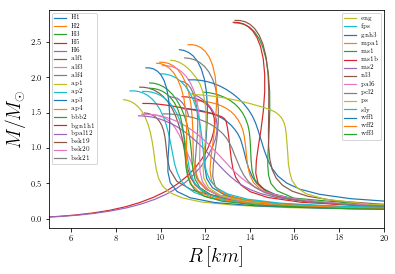

In [12]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

MR=[]
fig = plt.figure()
for EOS in EOSlist:
    R,M=np.loadtxt('results/'+EOS[:-4]+'/MRrhoc.dat',usecols=(0,1),unpack=True)
    maxi=np.argmax(M)+1
    pR=np.delete(R,np.s_[maxi:])
    pM=np.delete(M,np.s_[maxi:])
    MR+=plt.plot(pR,pM,'-', linewidth=1.2,label=EOS[:-4])
plt.xlabel(r'$R\,[km]$')
plt.ylabel(r'$M/M_{\odot}$')
plt.xlim(5,20)
l1 = plt.legend(MR[:18], [label[:-4] for label in EOSlist[:18]] , loc=2,prop={'size': 6})
l2 = plt.legend(MR[18:], [label[:-4] for label in EOSlist[18:]] , loc=1,prop={'size': 6})
plt.gca().add_artist(l1)
plt.savefig('figures/MRrels.pdf', format='pdf', dpi=1000,bbox_inches="tight")

# Stability

In [17]:
from scipy import integrate, interpolate

# H1

In [19]:
H1_145=np.loadtxt('results/H1/14.5.dat',unpack=True)
H1_145rho=interpolate.UnivariateSpline(H1_145[-1], H1_145[2], k=3, s=1e-20)
H1_145drho=interpolate.UnivariateSpline(H1_145[-1], H1_145[2], k=3, s=1e-20).derivative(n=1)
H1_145ddrho=interpolate.UnivariateSpline(H1_145[-1], H1_145[2], k=3, s=1e-20).derivative(n=2)

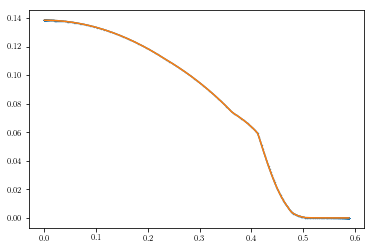

In [21]:
plt.plot(H1_145[-1],H1_145[2],marker='o',markersize='0.4')
plt.plot(H1_145[-1],H1_145rho(H1_145[-1]))